In [1]:
import numpy as np
import pylab as pl
import rocketlib
from rocketlib import *
from importlib import reload

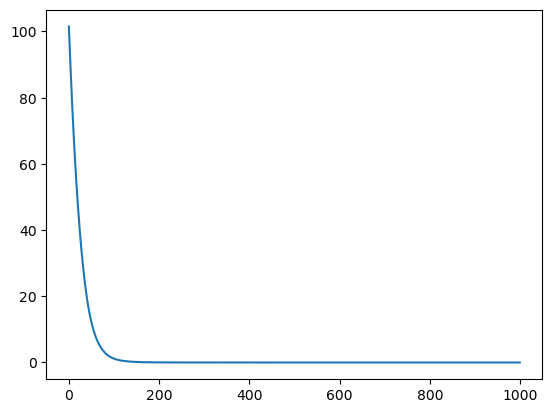

In [2]:
reload(rocketlib)
from rocketlib import *

planet = Planet()

p = list()
for i in np.linspace(0,300000,1000):
    p.append(planet.get_pressure(i))
pl.plot(p)

(0.0e+00s): stage1 started
(0.0e+00s): boost1 started
(0.0e+00s): boost2 started
(9.2e+01s): boost1 detached
(9.2e+01s): boost2 detached
(5.2e+02s): stage1 detached
(5.2e+02s): stage2 started
(1.5e+03s): stage2 detached
75666830.94277404


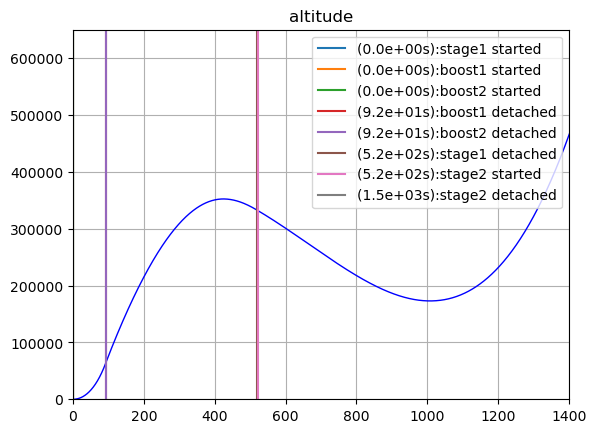

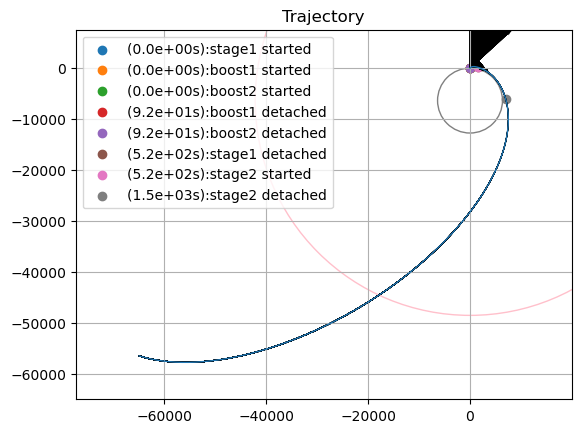

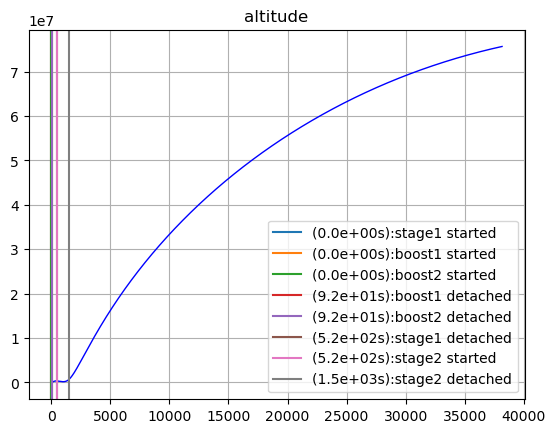

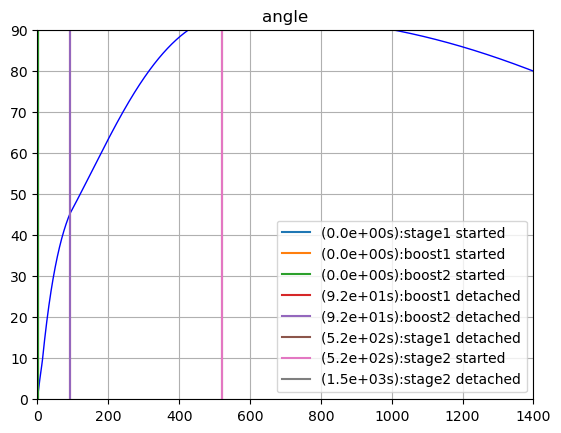

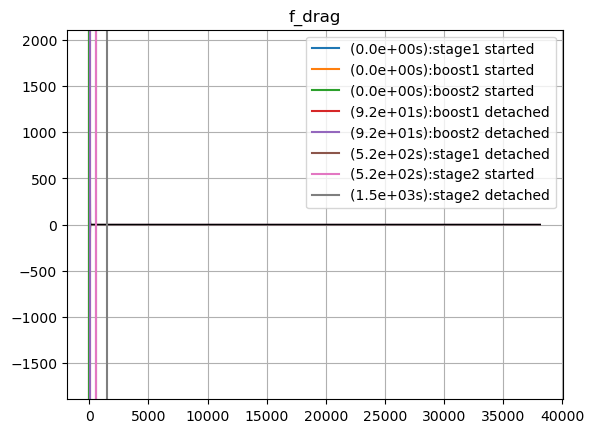

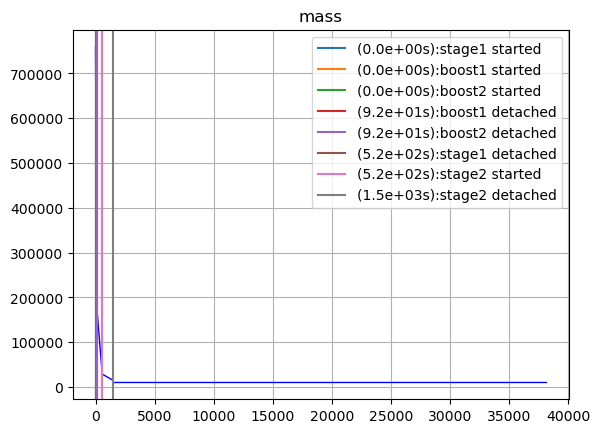

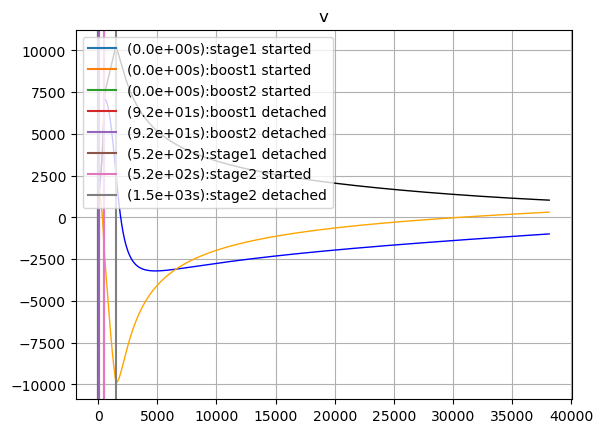

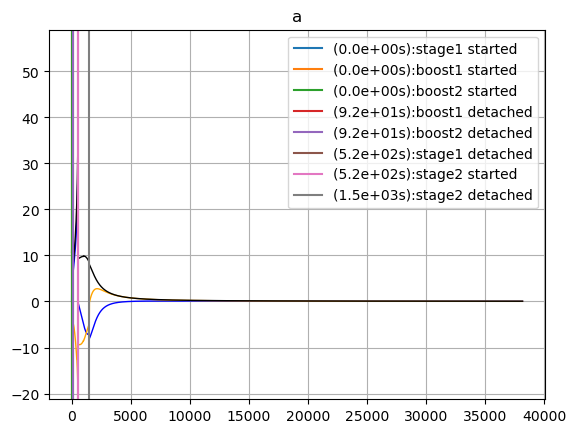

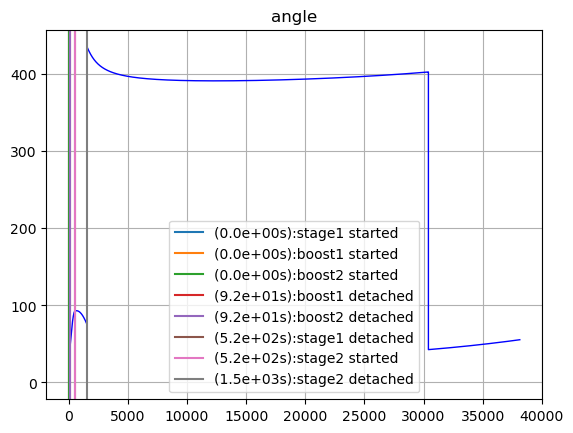

In [300]:
reload(rocketlib)
from rocketlib import *

# https://spaceflight101.com/ariane-5-va226/ariane-5-va226-launch-profile/
# https://www.arianespace.com/mission/ariane-flight-va226/
# https://www.arianespace.com/wp-content/uploads/2015/10/VA226-launchkit1-FR.pdf

rocket = Rocket(altitude=1, angle=90, dry_mass=10e3, dt_min=0.1)
#rocket.set_thruster_angle(10)
#rocket.set_velocity(0, 8000)
rocket.attach_engine('stage1', 170e3, ariane_stage1)
rocket.attach_engine('stage2', 14.9e3, ariane_stage2)
rocket.attach_engine('boost1', 240e3, ariane_booster)
rocket.attach_engine('boost2', 240e3, ariane_booster)

rocket.start_engine('stage1')
rocket.start_engine('boost1')
rocket.start_engine('boost2')
step = 0
while True:
    #print('==', step, rocket.get_altitude())
    
    if step > 100000: break
    if rocket.get_altitude() < 0: break
    
    
    
    if rocket.get_altitude() > 0:
        rocket.set_thruster_angle_wrt_axis(-0.05)
    if rocket.get_altitude() > 1e3 and np.rad2deg(rocket.get_angle_wrt_gravity()) < 90:
        rocket.set_thruster_angle_wrt_axis(-2.1)
        #    pass
    if rocket.get_altitude() > 200e3:
        if not rocket.is_started('stage2') and rocket.is_detached('stage1'):
            rocket.start_engine('stage2')
    #    rocket.set_thruster_angle_wrt_axis(0)
                    
                #rocket.set_thruster_angle_wrt_gravity(-90)
        
    
    #if rocket.is_detached('stage1'):
    #    rocket.set_thruster_angle_wrt_gravity(-90)
    #    
    #        
    
    
    rocket.update()
    
    step += 1
print(np.max(rocket.get_log('altitude')))

rocket.plot_vs_time('altitude')
pl.xlim(0,1400)
pl.ylim(0, 650e3)

rocket.plot_trajectory()

rocket.plot_vs_time('altitude')

rocket.plot_vs_time('angle')
pl.ylim(0, 90)
pl.xlim(0, 1400)

rocket.plot_vs_time('f_drag')

rocket.plot_vs_time('mass')

rocket.plot_vs_time('v')

rocket.plot_vs_time('a')

rocket.plot_vs_time('angle')


(0.0, 650000.0)

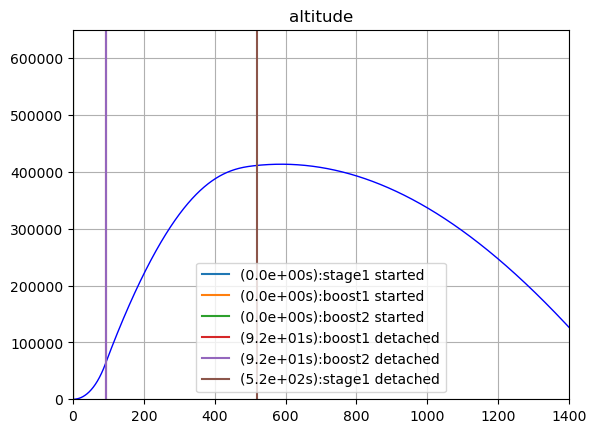

In [255]:
rocket.plot_vs_time('altitude')
pl.xlim(0,1400)
pl.ylim(0, 650e3)

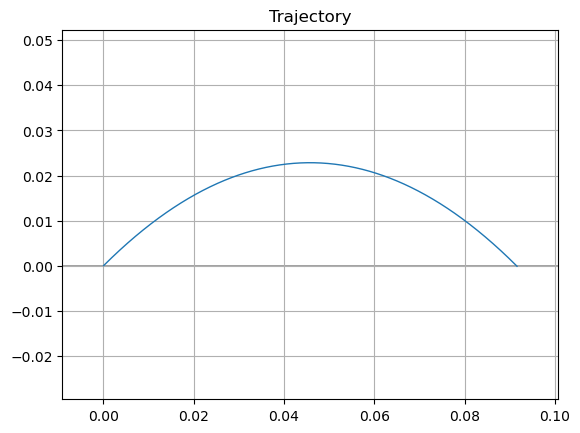

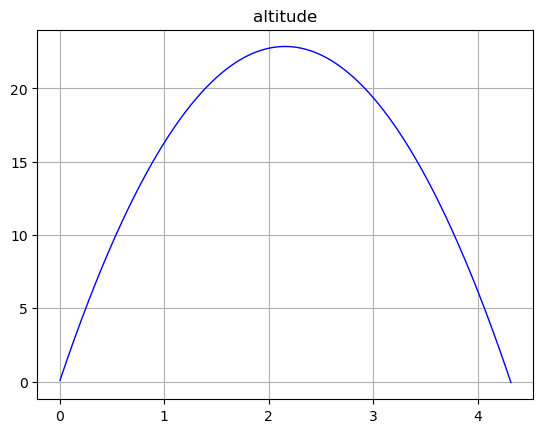

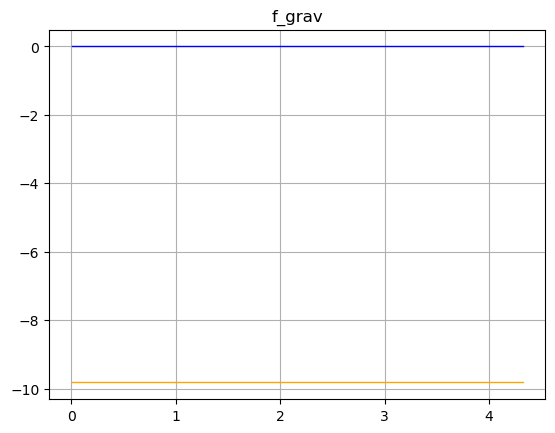

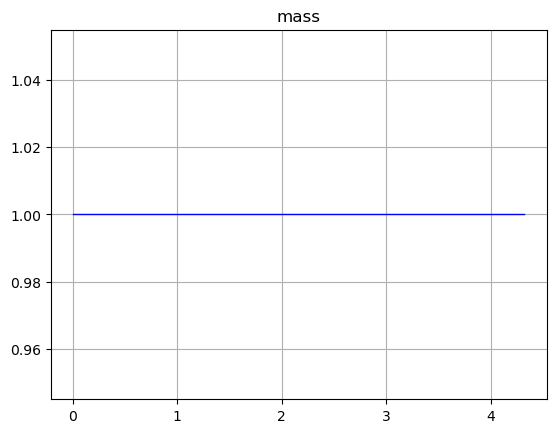

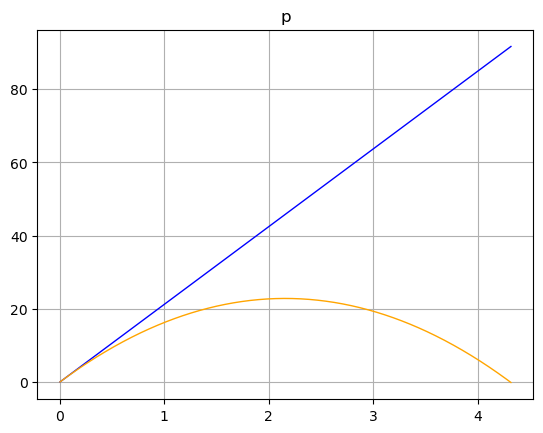

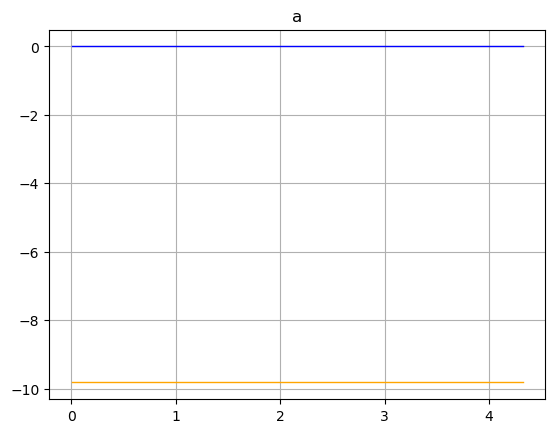

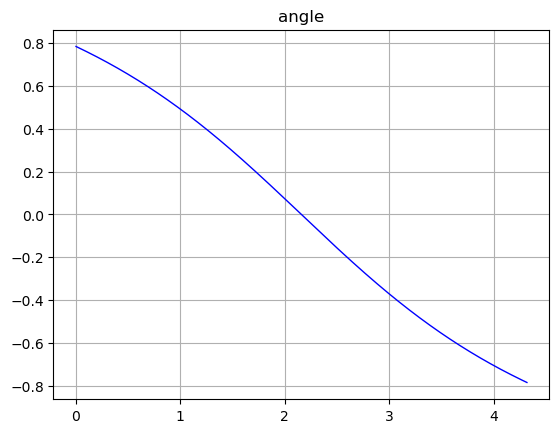

In [245]:
reload(rocketlib)
from rocketlib import *

rocket = Rocket(altitude=0.0001, angle=90, dry_mass=1, dt_min=1e-4, dt_fixed=False)
rocket.set_velocity(30, 45)

step = 0
while True:
    #print('==', step, rocket.get_altitude())
    
    if step > 5000: break
    if rocket.get_altitude() < 0: break
    
    rocket.update()
    
    step += 1
    
rocket.plot_trajectory()

rocket.plot_vs_time('altitude')

rocket.plot_vs_time('f_grav')

rocket.plot_vs_time('mass')

rocket.plot_vs_time('p')

rocket.plot_vs_time('a')

rocket.plot_vs_time('angle')
